## Multilinear Regression

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
california = fetch_california_housing()

In [8]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [11]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [12]:
california.target_names

['MedHouseVal']

In [13]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [14]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [15]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [16]:
#### Preparing the dataframe
dataset = pd.DataFrame(california.data,columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
dataset['Price'] = california.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [22]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [23]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [24]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

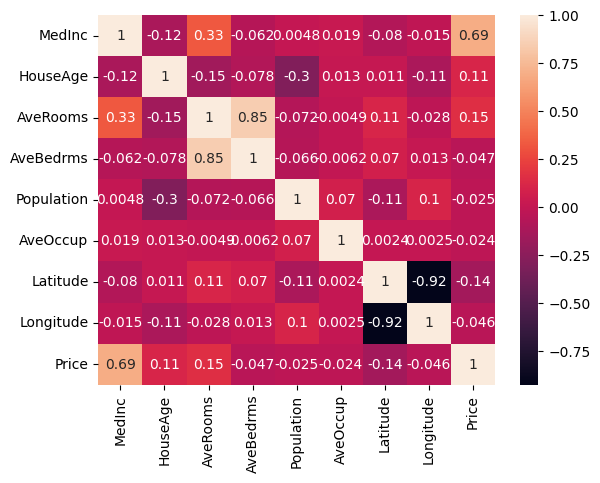

In [25]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [26]:
### Independent and Dependent features
X = dataset.iloc[:,:-1]    # Independent Features
y = dataset.iloc[:,-1]  #Dependent Features

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=33,random_state=10)

In [29]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((20607, 8), (33, 8), (33,), (20607,))

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_test

array([[ 7.40923456e-01, -1.32237669e+00, -3.89080926e-01,
        -2.44829143e-01, -9.00934559e-01,  8.28365858e-02,
        -6.89024273e-01,  1.94473171e-01],
       [ 5.34503706e-02, -1.30366965e-01, -3.27144577e-01,
        -4.24818421e-04,  3.98693866e-01, -8.32580279e-02,
         8.98155001e-01, -1.36761457e+00],
       [ 3.36208614e-01, -1.32237669e+00, -4.05100929e-01,
        -9.57126749e-03,  4.30478257e-01, -1.07272470e-01,
        -9.18439566e-01,  8.98161258e-01],
       [-4.03847399e-01,  2.85676649e-02, -3.36055705e-01,
        -1.25651752e-01,  5.18768232e-01,  1.52846087e-01,
        -7.12433996e-01,  8.08328736e-01],
       [ 4.22109852e-01, -1.79918058e+00,  1.21875510e-01,
        -1.33470396e-01, -4.02979103e-01, -1.29560692e-02,
         5.51691089e-01, -1.49884828e-01],
       [-4.28533478e-01, -1.16344206e+00,  1.08038365e-01,
        -5.48914305e-02,  2.23071084e+00, -3.75108369e-02,
         1.42253281e+00, -6.19010219e-01],
       [-1.64408224e-01,  9.027081

### Model Training

In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [47]:
linreg.fit(X_train,y_train)

LinearRegression()

In [48]:
linreg.coef_

array([ 0.82979436,  0.11872318, -0.26545563,  0.30549716, -0.00468333,
       -0.03932323, -0.89931193, -0.8699056 ])

In [49]:
linreg.intercept_

np.float64(2.0686481093803004)

In [50]:
### Prediction from the test data
y_pred =linreg.predict(X_test)
y_pred

array([3.00639097, 2.56761676, 2.34209806, 1.71684182, 1.7688207 ,
       0.77968497, 2.17885803, 2.2454455 , 1.17254007, 3.38351925,
       1.41769748, 1.90650655, 2.42543692, 1.20095838, 1.43658142,
       1.22565817, 1.70120717, 2.71024989, 2.38284601, 1.01614659,
       4.97744934, 1.21070693, 2.24180682, 1.51014091, 3.27081873,
       1.63389188, 2.57076961, 3.1081213 , 1.92710647, 1.04381436,
       2.29850461, 1.14778607, 2.28313663])

In [51]:
## Perfomance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.6137665742923195
0.5612430276683724
0.7834325588666324


In [52]:
score = r2_score(y_test,y_pred)
score

0.5441766910137178

In [53]:
AdjR2 = 1-(1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
AdjR2

0.3922355880182904

#### Assumptions

Text(0, 0.5, 'test Predicted Data')

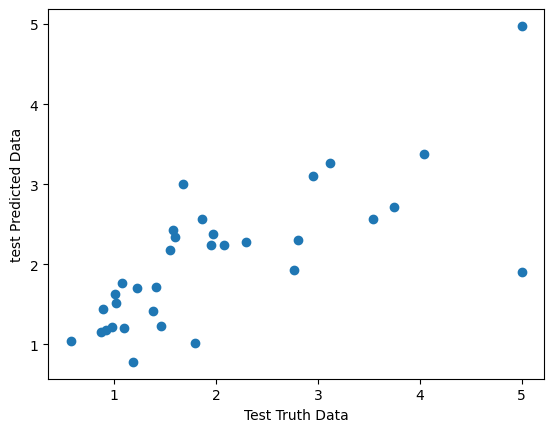

In [55]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("test Predicted Data")

In [56]:
### Residuals
residuals = y_test-y_pred

In [57]:
residuals

20303   -1.332391
16966    0.973383
10623   -0.740098
6146    -0.308842
2208    -0.690821
1982     0.408315
14883   -0.629858
7620    -0.164445
16191   -0.249540
17001    0.656481
12507   -0.039697
4644     3.093503
8097    -0.846437
13063   -0.106958
2344    -0.547581
6030     0.236342
5206    -0.475207
15833    1.039750
6089    -0.413846
19481    0.781853
6720     0.022561
5151    -0.231707
9678    -0.286807
19713   -0.496141
17070   -0.152819
2978    -0.626892
4185    -0.712770
11388   -0.159121
15280    0.835894
2893    -0.469814
16704    0.503495
2574    -0.278786
11031    0.008863
Name: Price, dtype: float64

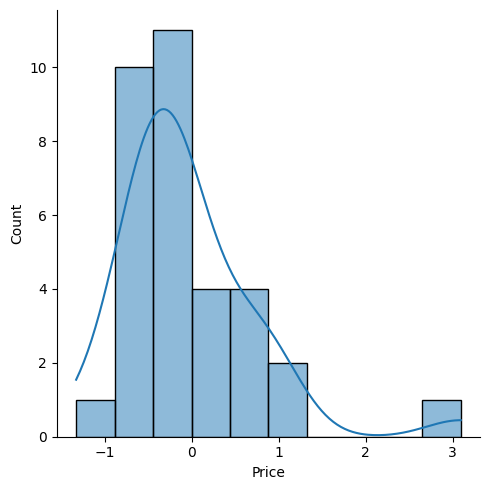

In [58]:
sns.displot(residuals,kde = True)

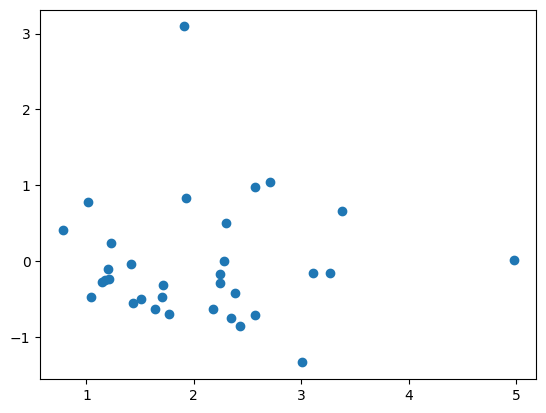

In [59]:
plt.scatter(y_pred,residuals)

### Pickling

In [74]:
import pickle
pickle.dump(linreg,open('regressor.pkl','wb'))

In [75]:
model = pickle.load(open('regressor.pkl','rb'))

In [76]:
model.predict(X_test)

array([3.00639097, 2.56761676, 2.34209806, 1.71684182, 1.7688207 ,
       0.77968497, 2.17885803, 2.2454455 , 1.17254007, 3.38351925,
       1.41769748, 1.90650655, 2.42543692, 1.20095838, 1.43658142,
       1.22565817, 1.70120717, 2.71024989, 2.38284601, 1.01614659,
       4.97744934, 1.21070693, 2.24180682, 1.51014091, 3.27081873,
       1.63389188, 2.57076961, 3.1081213 , 1.92710647, 1.04381436,
       2.29850461, 1.14778607, 2.28313663])